In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [372]:
data=pd.read_csv('E:/google/londondata.csv')

In [373]:
data['DateOfCall'] = pd.to_datetime(data['DateOfCall'])

In [4]:
fire_2020 = data.loc[data['CalYear']==2020]
fire_2019 = data.loc[data['CalYear']==2019]
fire_2018 = data.loc[data['CalYear']==2018]
fire_2017 = data.loc[data['CalYear']==2017]

In [5]:
#clean the unmeaning fire
fire_20=fire_2020.dropna(subset=['PumpHoursRoundUp'])
fire_19=fire_2019.dropna(subset=['PumpHoursRoundUp'])
fire_18=fire_2018.dropna(subset=['PumpHoursRoundUp'])
fire_17=fire_2017.dropna(subset=['PumpHoursRoundUp'])

In [6]:
#ge the agg in different brough
x=pd.DataFrame(fire_20.groupby('IncGeo_BoroughCode').agg(lambda x: np.mean(x.mode())).reset_index())
y=pd.DataFrame(fire_19.groupby('IncGeo_BoroughCode').agg(lambda x: np.mean(x.mode())).reset_index())
z=pd.DataFrame(fire_18.groupby('IncGeo_BoroughCode').agg(lambda x: np.mean(x.mode())).reset_index())
a=pd.DataFrame(fire_17.groupby('IncGeo_BoroughCode').agg(lambda x: np.mean(x.mode())).reset_index())

In [7]:
#fill the null value of attendence time
fire_20['FirstPumpArriving_AttendanceTime'] = fire_20['FirstPumpArriving_AttendanceTime'].fillna(x['FirstPumpArriving_AttendanceTime'].mean())
fire_19['FirstPumpArriving_AttendanceTime'] = fire_19['FirstPumpArriving_AttendanceTime'].fillna(y['FirstPumpArriving_AttendanceTime'].mean())
fire_18['FirstPumpArriving_AttendanceTime'] = fire_18['FirstPumpArriving_AttendanceTime'].fillna(z['FirstPumpArriving_AttendanceTime'].mean())
fire_17['FirstPumpArriving_AttendanceTime'] = fire_17['FirstPumpArriving_AttendanceTime'].fillna(a['FirstPumpArriving_AttendanceTime'].mean())

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [8]:
#test the data
fire_20.FirstPumpArriving_AttendanceTime.isnull().sum()
fire_19.FirstPumpArriving_AttendanceTime.isnull().sum()
fire_18.FirstPumpArriving_AttendanceTime.isnull().sum()
fire_17.FirstPumpArriving_AttendanceTime.isnull().sum()

0

In [9]:
#cut the data
after = fire_2020.loc[fire_2020['DateOfCall']>='2020-03-20']
data_2020 = fire_2020.loc[fire_2020['DateOfCall']<'2020-03-20']

In [67]:
#count the fire
fire_20.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
314502,000253-01012020,2020-01-01,2020,1900/1/0 9:58,9,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,...,Homerton,288.0,Homerton,NaN,NaN,1.0,1.0,1.0,1.0,339.0
314503,000369-01012020,2020-01-01,2020,1900/1/0 15:51,15,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,Homerton,353.0,Homerton,NaN,NaN,1.0,1.0,1.0,1.0,339.0
314504,000238-01012020,2020-01-01,2020,1900/1/0 9:03,9,Special Service,Special Service,Lift Release,Non Residential,Purpose built office,...,Millwall,202.0,Millwall,NaN,NaN,1.0,1.0,1.0,1.0,339.0
314505,000498-01012020,2020-01-01,2020,1900/1/0 21:58,21,False Alarm,False alarm - Good intent,NaN,Non Residential,DIY Warehouse,...,Sidcup,266.0,Sidcup,306.0,Sidcup,1.0,2.0,2.0,2.0,678.0
314506,000066-01012020,2020-01-01,2020,1900/1/0 0:55,0,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,Peckham,240.0,Peckham,229.0,New Cross,2.0,2.0,2.0,1.0,339.0


In [10]:
# all fires 
data_20=pd.DataFrame(data_2020.groupby('IncGeo_BoroughCode').CalYear.count())
data_19=pd.DataFrame(fire_2019.groupby('IncGeo_BoroughCode').CalYear.count())
data_18=pd.DataFrame(fire_2018.groupby('IncGeo_BoroughCode').CalYear.count())
data_17=pd.DataFrame(fire_2017.groupby('IncGeo_BoroughCode').CalYear.count())

In [11]:
# get the attending time data
data_20['time']=pd.DataFrame(data_2020.groupby('IncGeo_BoroughCode').FirstPumpArriving_AttendanceTime.mean())
data_19['time']=pd.DataFrame(fire_2019.groupby('IncGeo_BoroughCode').FirstPumpArriving_AttendanceTime.mean())
data_18['time']=pd.DataFrame(fire_2018.groupby('IncGeo_BoroughCode').FirstPumpArriving_AttendanceTime.mean())
data_17['time']=pd.DataFrame(fire_2017.groupby('IncGeo_BoroughCode').FirstPumpArriving_AttendanceTime.mean())

In [12]:
data_20.head()

,CalYear,time
IncGeo_BoroughCode,,
E09000001,246,285.452991
E09000002,348,343.534743
E09000003,687,332.742424
E09000004,420,342.985000
E09000005,592,331.146384


In [13]:
#get the average month fire data
data_20['fire']=data_20['CalYear']/(2/3+2)
data_19['fire']=data_19['CalYear']/12
data_18['fire']=data_18['CalYear']/12
data_17['fire']=data_17['CalYear']/12

In [14]:
# except the unmeaning fire call
data_20['after']=pd.DataFrame(data_2020.groupby('IncGeo_BoroughCode').PumpHoursRoundUp.count())/(2/3+2)
data_19['after']=pd.DataFrame(fire_2019.groupby('IncGeo_BoroughCode').PumpHoursRoundUp.count())/12
data_18['after']=pd.DataFrame(fire_2018.groupby('IncGeo_BoroughCode').PumpHoursRoundUp.count())/12
data_17['after']=pd.DataFrame(fire_2017.groupby('IncGeo_BoroughCode').PumpHoursRoundUp.count())/12

In [15]:
#the difference between two data
data_20['diff']=data_20['fire']-data_20['after']
data_19['diff']=data_19['fire']-data_19['after']
data_18['diff']=data_18['fire']-data_18['after']
data_17['diff']=data_17['fire']-data_17['after']

In [16]:
#rank the time data
data_20.sort_values("time",inplace=True)
data_19.sort_values("time",inplace=True)
data_18.sort_values("time",inplace=True)
data_17.sort_values("time",inplace=True)

In [17]:
#reset index
data_20=data_20.reset_index()
data_19=data_19.reset_index()
data_18=data_18.reset_index()
data_17=data_17.reset_index()

In [18]:
#rank the fire data
data_20.sort_values("after",inplace=True)
data_19.sort_values("after",inplace=True)
data_18.sort_values("after",inplace=True)
data_17.sort_values("after",inplace=True)

In [19]:
#reset index
data_20=data_20.reset_index()
data_19=data_19.reset_index()
data_18=data_18.reset_index()
data_17=data_17.reset_index()

In [20]:
#rank the diff data
data_20.sort_values("diff",inplace=True)
data_19.sort_values("diff",inplace=True)
data_18.sort_values("diff",inplace=True)
data_17.sort_values("diff",inplace=True)

In [21]:
#reset index
data_20=data_20.reset_index()
data_19=data_19.reset_index()
data_18=data_18.reset_index()
data_17=data_17.reset_index()

In [22]:
#rename the columns
data_20 = data_20.rename(columns={'index': 'time_rank'})
data_20 = data_20.rename(columns={'level_0': 'fire_rank'})
data_19 = data_19.rename(columns={'index': 'time_rank'})
data_19 = data_19.rename(columns={'level_0': 'fire_rank'})
data_18 = data_18.rename(columns={'index': 'time_rank'})
data_18 = data_18.rename(columns={'level_0': 'fire_rank'})
data_17 = data_17.rename(columns={'index': 'time_rank'})
data_17 = data_17.rename(columns={'level_0': 'fire_rank'})

In [23]:
#get the total rank mark
data_20['total_rank']=(data_20['fire_rank']+data_20['time_rank'])/2
data_19['total_rank']=(data_19['fire_rank']+data_19['time_rank'])/2
data_18['total_rank']=(data_18['fire_rank']+data_19['time_rank'])/2
data_17['total_rank']=(data_17['fire_rank']+data_19['time_rank'])/2

In [24]:
data_20.head()

,fire_rank,time_rank,IncGeo_BoroughCode,CalYear,time,fire,after,diff,total_rank
0,23,0,E09000020,718,248.463158,269.250,269.250,0.000,11.5
1,12,11,E09000031,573,294.490090,214.875,214.875,0.000,11.5
2,3,24,E09000015,330,336.313665,123.750,123.375,0.375,13.5
3,4,30,E09000002,348,343.534743,130.500,130.125,0.375,17.0
4,5,19,E09000024,368,326.561605,138.000,137.625,0.375,12.0


In [25]:
#get the geo data of brough
brough= gpd.read_file( r'E:/google/statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

In [26]:
#merge the data
data_0= brough.merge(data_20, left_on="GSS_CODE", right_on="IncGeo_BoroughCode")
data_9= brough.merge(data_19, left_on="GSS_CODE", right_on="IncGeo_BoroughCode")
data_8= brough.merge(data_18, left_on="GSS_CODE", right_on="IncGeo_BoroughCode")
data_7= brough.merge(data_17, left_on="GSS_CODE", right_on="IncGeo_BoroughCode")

In [ ]:
data_9.head()

<Figure size 432x288 with 0 Axes>

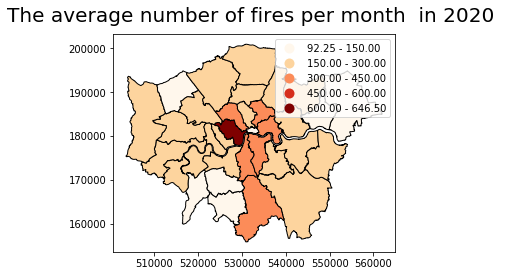

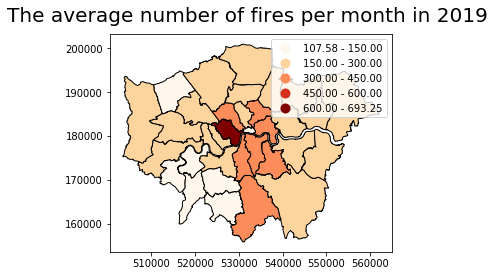

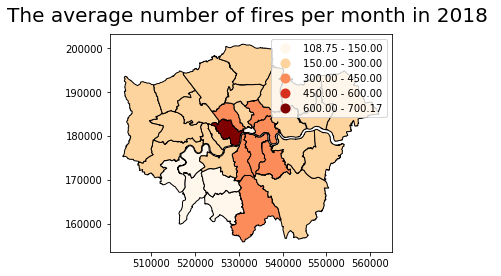

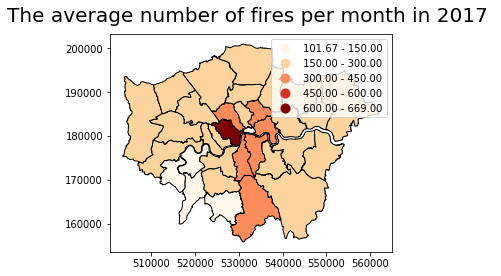

In [35]:
#build a fire map per month
import  matplotlib.pyplot as plt

plt.figure()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
#创建小图1
##将小图分成2行2列,第三个参数表示第n个图

#设置小图的x,y坐标
data_0f=data_0.plot(column = 'fire',cmap='OrRd',edgecolor='black', legend= True, scheme = 'user_defined', classification_kwds={'bins':[150,300,450,600]})
data_0f.set_title('The average number of the fires  per month in 2020 ',fontdict={'fontsize':20},pad=12.5)
axs[0,0]=data_0f
#创建小图2
#第三个参数表示是第2个图

#y坐标是0--2
data_9f=data_9.plot(column = 'fire',cmap='OrRd',edgecolor='black',legend= True, scheme = 'user_defined', classification_kwds={'bins':[150,300,450,600]})
data_9f.set_title('The average number of the fires  per month  in 2019 ',fontdict={'fontsize':20},pad=12.5)
axs[0,1]=data_9f
#创建小图3

data_8f=data_8.plot(column = 'fire',cmap='OrRd',edgecolor='black', legend= True, scheme = 'user_defined', classification_kwds={'bins':[150,300,450,600]})
data_8f.set_title('The average number of the fires  per month in 2018 ',fontdict={'fontsize':20},pad=12.5)
axs[1,0]=data_8f
#创建小图4

data_7f=data_7.plot(column = 'fire',cmap='OrRd',edgecolor='black', legend= True, scheme = 'user_defined', classification_kwds={'bins':[150,300,450,600]})
data_7f.set_title('The average number of the fires  per month   in 2017 ',fontdict={'fontsize':20},pad=12.5)

plt.show()

Text(0.5, 1.0, 'The average number of fires in different boroughs per month')

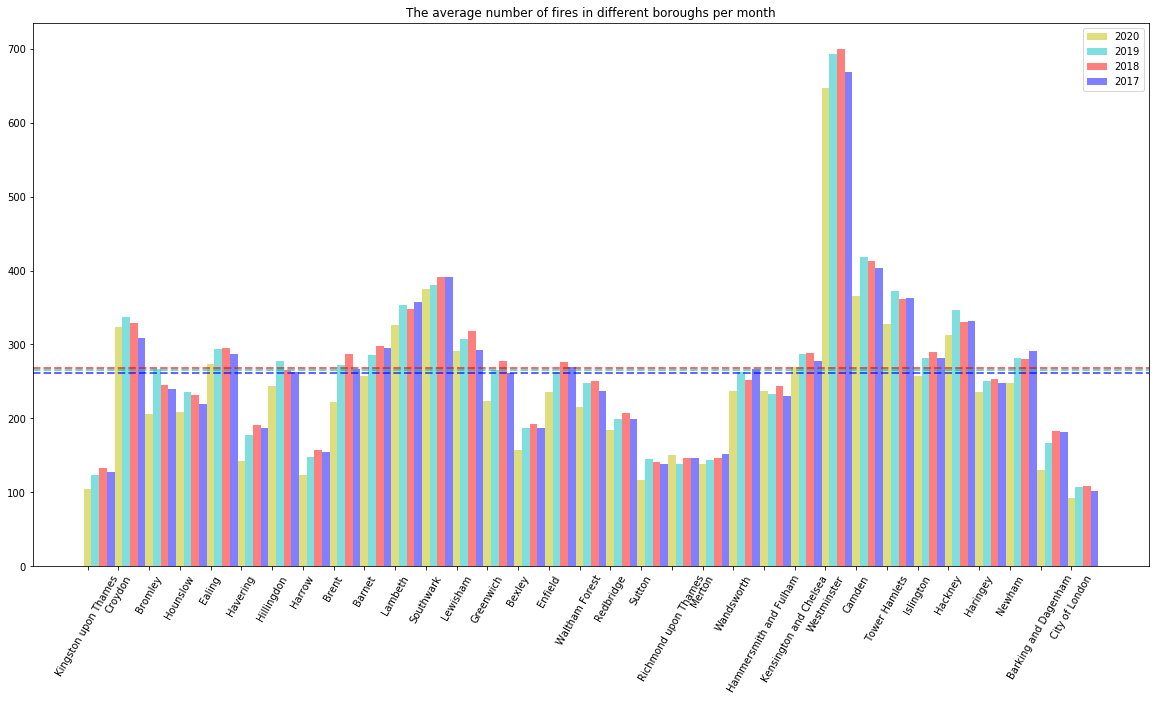

In [36]:
#get the graph of the data
import matplotlib.pyplot as plt
import numpy as np

x1 = data_9['NAME']   #横坐标
y = data_0['fire']
y1 = data_9['fire']   #第一个纵坐标
y2 = data_8['fire']  
y3= data_7['fire'] #第二个纵坐标
x = np.arange(len(x1)) 




# plt the data
plt.figure(figsize=(20, 10))
#2020
plt.bar(x, y,
        width = 0.25,
        color = 'y',
        align = 'center',
        label = '2020',
        alpha = 0.5
       )
# 2019
plt.bar(x+ 0.25, y1,
        width = 0.25,
        color = 'c',
        align = 'center',
        label = '2019',
        alpha = 0.5
       )
# 2018
plt.bar(x+0.5, y2,
        width = 0.25,
        color = 'r',
        align = 'center',
        label = '2018',
        alpha = 0.5
       )
# 2017
plt.bar(x+0.75, y3,
        width = 0.25,
        color = 'b',
        align = 'center',
        label = '2017',
        alpha = 0.5
       )

# 添加三门科目成绩的均值参考线
# 语文
plt.axhline(y = np.mean(y1),
           c = 'c',
           ls = '--',
           lw = 2, 
           alpha = 0.6)
# 数学
plt.axhline(y = np.mean(y2),
           c = 'r',
           ls = '--',
           lw = 2, 
           alpha = 0.6)
# 英语
plt.axhline(y = np.mean(y3),
           c = 'b',
           ls = '--',
           lw = 2, 
           alpha = 0.6)



plt.xticks(x,(x1),rotation=60)
# 图例
plt.legend(loc = 'upper right')

# 标题
plt.title('The average number of fires in different boroughs per month')


Text(0.5, 1.0, 'The average number of real fires in different boroughs per month')

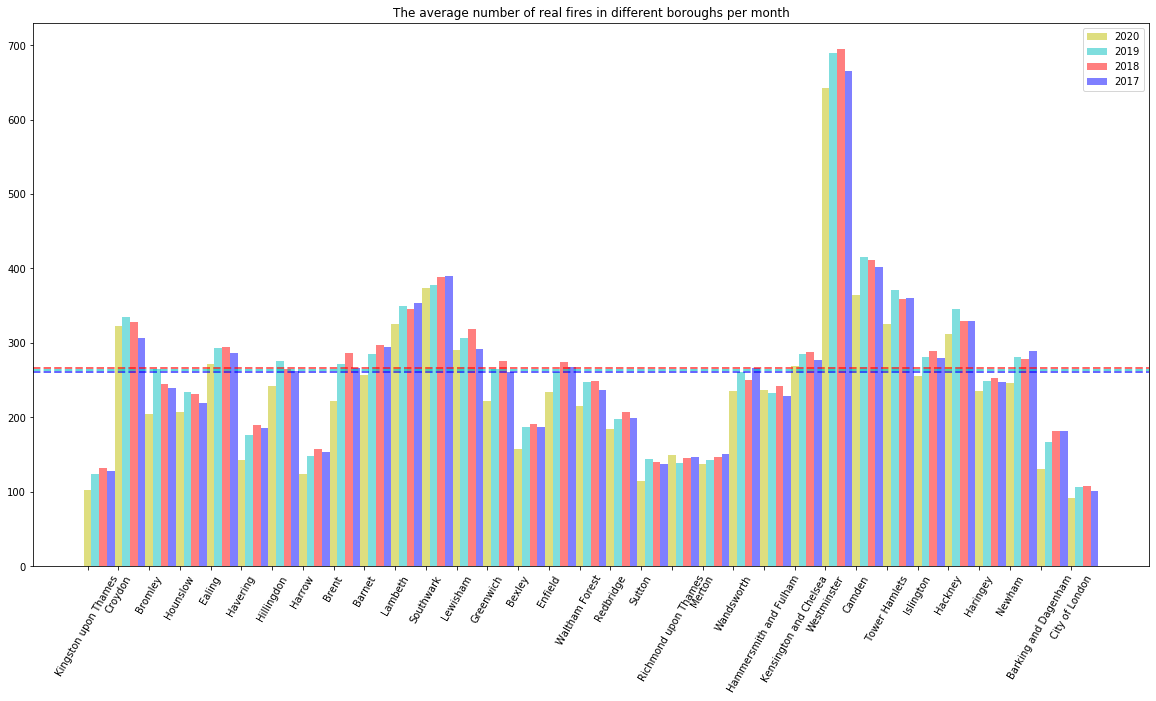

In [37]:
#get the graph of the data
import matplotlib.pyplot as plt
import numpy as np

x1 = data_9['NAME']   #横坐标
y = data_0['after']
y1 = data_9['after']   #第一个纵坐标
y2 = data_8['after']  
y3= data_7['after'] #第二个纵坐标
x = np.arange(len(x1)) 




# plt the data
plt.figure(figsize=(20, 10))
#2020
plt.bar(x, y,
        width = 0.25,
        color = 'y',
        align = 'center',
        label = '2020',
        alpha = 0.5
       )
# 2019
plt.bar(x+ 0.25, y1,
        width = 0.25,
        color = 'c',
        align = 'center',
        label = '2019',
        alpha = 0.5
       )
# 2018
plt.bar(x+0.5, y2,
        width = 0.25,
        color = 'r',
        align = 'center',
        label = '2018',
        alpha = 0.5
       )
# 2017
plt.bar(x+0.75, y3,
        width = 0.25,
        color = 'b',
        align = 'center',
        label = '2017',
        alpha = 0.5
       )

# 添加三门科目成绩的均值参考线
# 语文
plt.axhline(y = np.mean(y1),
           c = 'c',
           ls = '--',
           lw = 2, 
           alpha = 0.6)
# 数学
plt.axhline(y = np.mean(y2),
           c = 'r',
           ls = '--',
           lw = 2, 
           alpha = 0.6)
# 英语
plt.axhline(y = np.mean(y3),
           c = 'b',
           ls = '--',
           lw = 2, 
           alpha = 0.6)



plt.xticks(x,(x1),rotation=60)
# 图例
plt.legend(loc = 'upper right')

# 标题
plt.title('The average number of real fires in different boroughs per month')


Text(0.5, 1.0, 'The average time of fire brigade arrival in different boroughs (s)')

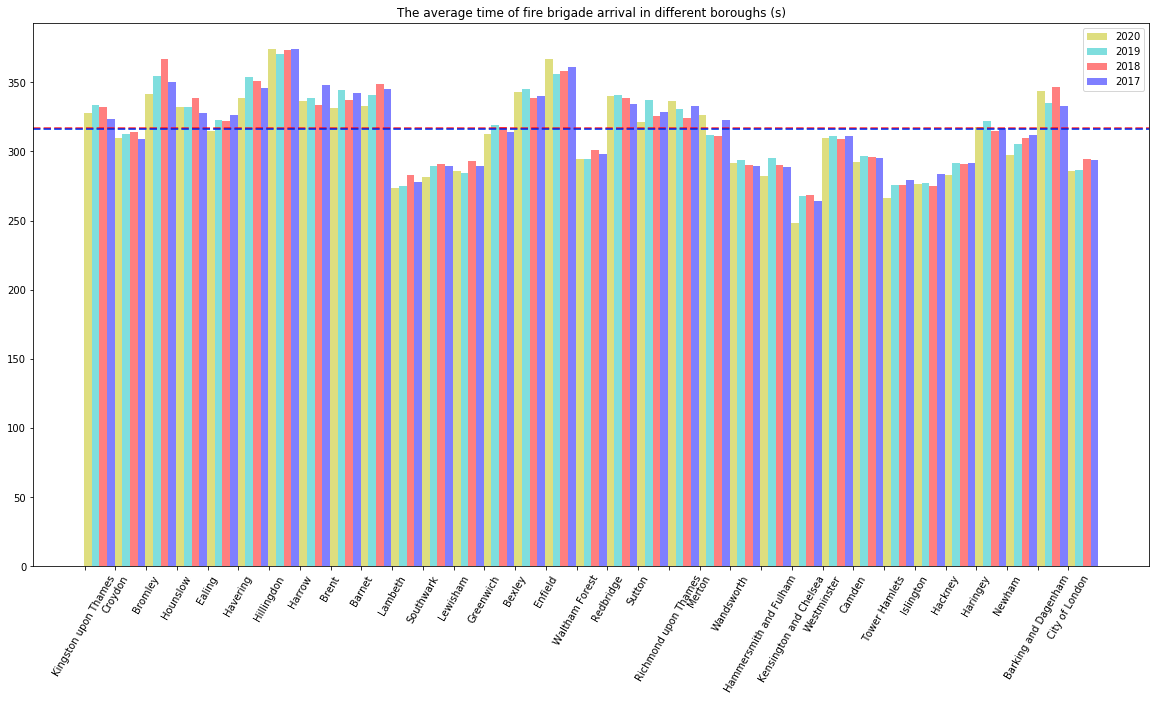

In [38]:
#get the graph of the data
import matplotlib.pyplot as plt
import numpy as np

x1 = data_9['NAME']   #横坐标
y = data_0['time']
y1 = data_9['time']   #第一个纵坐标
y2 = data_8['time']  
y3= data_7['time'] #第二个纵坐标
x = np.arange(len(x1)) 




# plt the data
plt.figure(figsize=(20, 10))
#2020
plt.bar(x+0.1, y,
        width = 0.25,
        color = 'y',
        align = 'center',
        label = '2020',
        alpha = 0.5
       )
# 2019
plt.bar(x+ 0.35, y1,
        width = 0.25,
        color = 'c',
        align = 'center',
        label = '2019',
        alpha = 0.5
       )
# 2018
plt.bar(x+0.6, y2,
        width = 0.25,
        color = 'r',
        align = 'center',
        label = '2018',
        alpha = 0.5
       )
# 2017
plt.bar(x+0.85, y3,
        width = 0.25,
        color = 'b',
        align = 'center',
        label = '2017',
        alpha = 0.5
       )

# 添加三门科目成绩的均值参考线
# 语文
plt.axhline(y = np.mean(y1),
           c = 'c',
           ls = '--',
           lw = 2, 
           alpha = 0.6)
# 数学
plt.axhline(y = np.mean(y2),
           c = 'r',
           ls = '--',
           lw = 2, 
           alpha = 0.6)
# 英语
plt.axhline(y = np.mean(y3),
           c = 'b',
           ls = '--',
           lw = 2, 
           alpha = 0.6)



plt.xticks(x,(x1),rotation=60)
# 图例
plt.legend(loc = 'upper right')

# 标题
plt.title('The average time of fire brigade arrival in different boroughs (s)')


Text(0.5, 1.0, 'The average number of useless fire alarms per month')

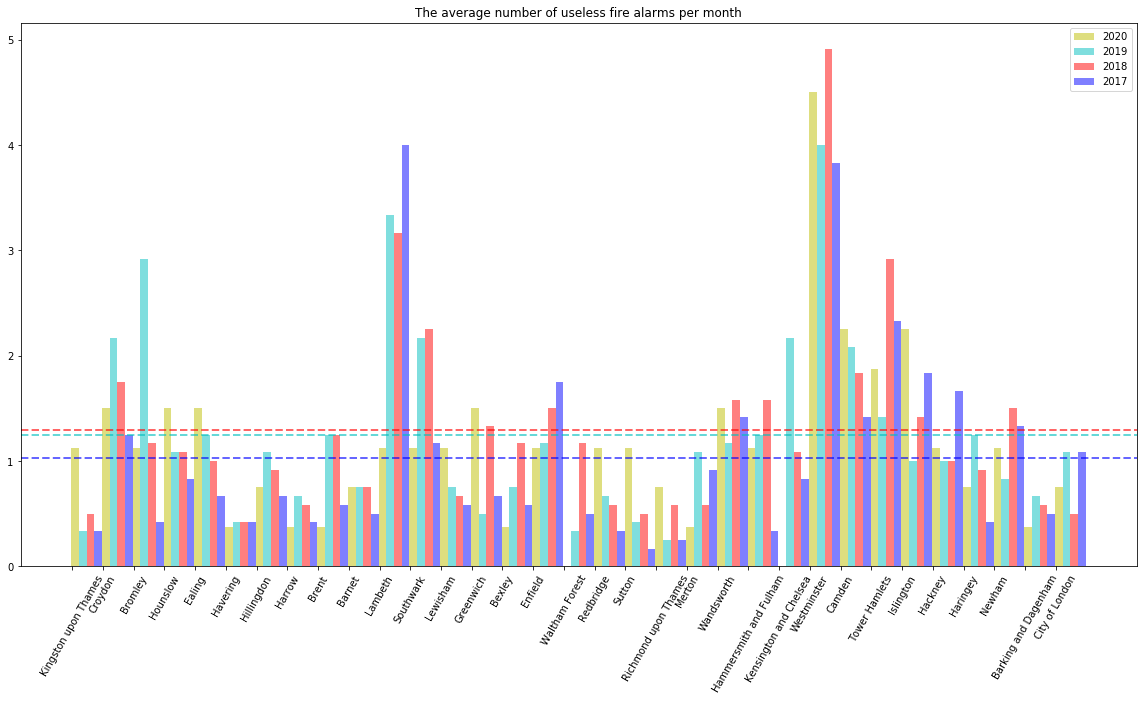

In [39]:
#get the graph of the data
import matplotlib.pyplot as plt
import numpy as np

x1 = data_9['NAME']   #横坐标
y = data_0['diff']
y1 = data_9['diff']   #第一个纵坐标
y2 = data_8['diff']  
y3= data_7['diff'] #第二个纵坐标
x = np.arange(len(x1)) 




# plt the data
plt.figure(figsize=(20, 10))
#2020
plt.bar(x+0.1, y,
        width = 0.25,
        color = 'y',
        align = 'center',
        label = '2020',
        alpha = 0.5
       )
# 2019
plt.bar(x+ 0.35, y1,
        width = 0.25,
        color = 'c',
        align = 'center',
        label = '2019',
        alpha = 0.5
       )
# 2018
plt.bar(x+0.6, y2,
        width = 0.25,
        color = 'r',
        align = 'center',
        label = '2018',
        alpha = 0.5
       )
# 2017
plt.bar(x+0.85, y3,
        width = 0.25,
        color = 'b',
        align = 'center',
        label = '2017',
        alpha = 0.5
       )

# 添加三门科目成绩的均值参考线
# 语文
plt.axhline(y = np.mean(y1),
           c = 'c',
           ls = '--',
           lw = 2, 
           alpha = 0.6)
# 数学
plt.axhline(y = np.mean(y2),
           c = 'r',
           ls = '--',
           lw = 2, 
           alpha = 0.6)
# 英语
plt.axhline(y = np.mean(y3),
           c = 'b',
           ls = '--',
           lw = 2, 
           alpha = 0.6)



plt.xticks(x,(x1),rotation=60)
# 图例
plt.legend(loc = 'upper right')

# 标题
plt.title('The average number of useless fire alarms per month')


In [ ]:
data_19.head()

In [ ]:
data_9.head()

In [ ]:
import numpy as np

<Figure size 432x288 with 0 Axes>

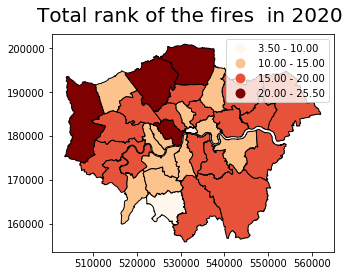

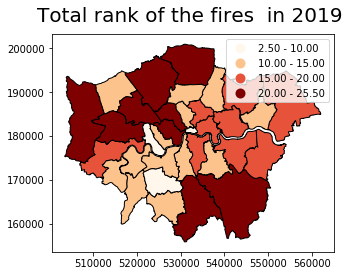

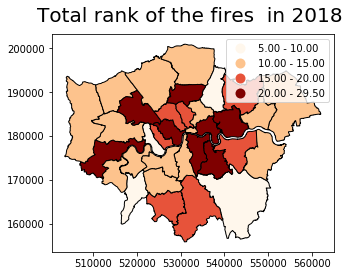

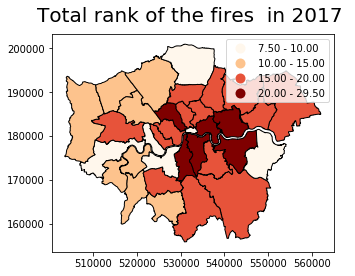

In [46]:
#show the map
import  matplotlib.pyplot as plt


plt.figure()


data_0p=data_0.plot(column = 'total_rank',cmap='OrRd',edgecolor='black',legend= True, scheme = 'user_defined', classification_kwds={'bins':[10,15,20]})
data_0p.set_title('Total rank of the fires  in 2020 ',fontdict={'fontsize':20},pad=12.5)

data_9p=data_9.plot(column = 'total_rank',cmap='OrRd',edgecolor='black',legend= True, scheme = 'user_defined', classification_kwds={'bins':[10,15,20]})
data_9p.set_title('Total rank of the fires  in 2019 ',fontdict={'fontsize':20},pad=12.5)

data_8p=data_8.plot(column = 'total_rank',cmap='OrRd',edgecolor='black',legend= True, scheme = 'user_defined', classification_kwds={'bins':[10,15,20]})
data_8p.set_title('Total rank of the fires  in 2018 ',fontdict={'fontsize':20},pad=12.5)

data_7p=data_7.plot(column = 'total_rank',cmap='OrRd',edgecolor='black', legend= True, scheme = 'user_defined', classification_kwds={'bins':[10,15,20]})
data_7p.set_title('Total rank of the fires  in 2017 ',fontdict={'fontsize':20},pad=12.5)

plt.show()

In [61]:
#get the top 5 total rank area
data_0r=  data_7.loc[data_7['total_rank']>=18]

In [62]:
data_0r.sort_values("total_rank",inplace=True)

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
data_0r

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,fire_rank,time_rank,IncGeo_BoroughCode,CalYear,time,fire,after,diff,total_rank
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",26,12,E09000008,3701,309.251133,308.416667,307.166667,1.250000,18.0
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",22,19,E09000009,3447,326.145064,287.250000,286.583333,0.666667,18.0
12,Lewisham,E09000023,3531.706,16.795,T,None,None,"POLYGON ((536691.000 178958.600, 536691.900 17...",24,6,E09000023,3510,289.459346,292.500000,291.916667,0.583333,18.0
27,Islington,E09000019,1485.664,0.000,T,None,None,"POLYGON ((529153.600 185861.400, 529144.800 18...",21,3,E09000019,3379,283.654106,281.583333,279.750000,1.833333,18.0
16,Waltham Forest,E09000031,3880.793,0.000,F,None,None,"POLYGON ((539923.100 191863.100, 539928.100 19...",12,11,E09000031,2846,298.043321,237.166667,236.666667,0.500000,19.0
29,Haringey,E09000014,2959.837,0.000,T,None,None,"POLYGON ((531928.400 187801.500, 531919.200 18...",14,16,E09000014,2977,316.784653,248.083333,247.666667,0.416667,19.0
23,Kensington and Chelsea,E09000020,1238.379,25.994,T,None,None,"POLYGON ((526219.700 176948.000, 526208.800 17...",20,0,E09000020,3330,264.119664,277.500000,276.666667,0.833333,20.0
10,Lambeth,E09000022,2724.940,43.927,T,None,None,"POLYGON ((530046.800 177893.400, 530048.400 17...",28,1,E09000022,4293,277.848376,357.750000,353.750000,4.000000,20.5
25,Camden,E09000007,2178.932,0.000,T,None,None,"POLYGON ((528840.200 187217.800, 528834.600 18...",31,10,E09000007,4842,295.403363,403.500000,402.083333,1.416667,21.0
11,Southwark,E09000028,2991.340,105.139,T,None,None,"POLYGON ((531335.600 180529.500, 531337.700 18...",30,7,E09000028,4693,289.648498,391.083333,389.916667,1.166667,23.5


In [64]:
#get the geo data of lsoa
lsoa= gpd.read_file( r'E:/google/statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp')

In [65]:
lsoa.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [105]:
#get the brough data in average 
df_br = data.loc[data['DateOfCall']<'2020-03-20']

In [134]:
import seaborn as sns

E:\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1, 'Correlation between variables')

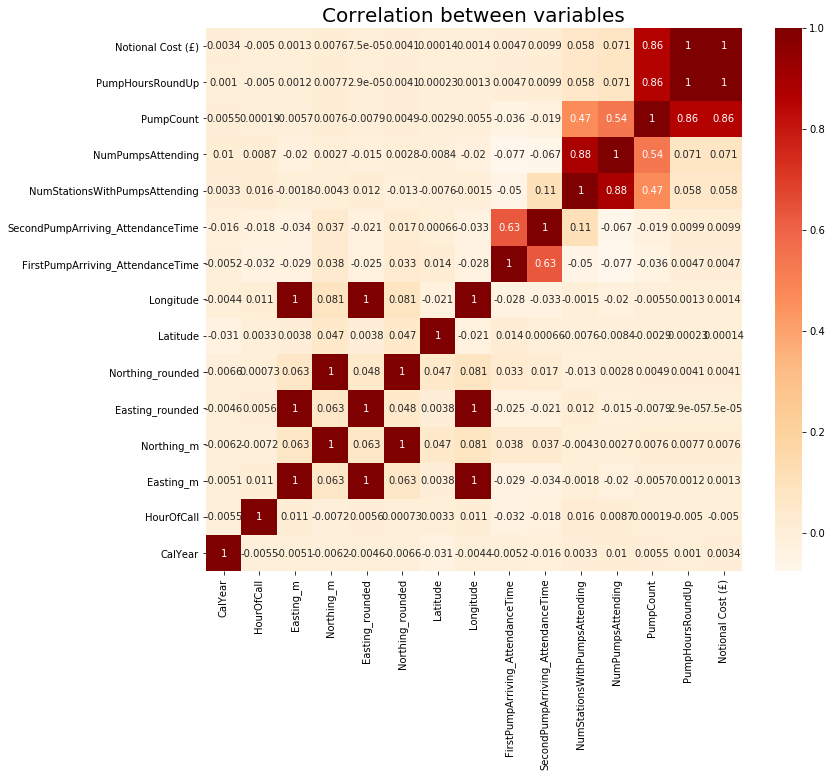

In [137]:
corr=df_br.corr()
plt.figure(figsize = (12,10))        # Sample figsize in inches
ax= sns.heatmap(corr,cmap='OrRd',annot=True)
ax.set_ylim([0,15])

ax.set_title('Correlation between variables', fontsize =20)

In [152]:
data_cleans=df_br.drop(['Northing_rounded','Easting_rounded','Easting_m','Northing_m','PumpHoursRoundUp','PumpCount','NumPumpsAttending'],axis=1)

In [155]:
data_cleans.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,Notional Cost (£)
0,000336-01012017,2017-01-01,2017,1900/1/0 16:20,16,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,NaN,NaN,London,Plaistow,211.0,Plaistow,NaN,NaN,2.0,326.0
1,000322-01012017,2017-01-01,2017,1900/1/0 15:44,15,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,NaN,NaN,London,Eltham,320.0,Eltham,689.0,Sidcup,2.0,326.0
2,000196-01012017,2017-01-01,2017,1900/1/0 8:19,8,False Alarm,AFA,NaN,Non Residential,Large supermarket,...,51.591167,-0.005050,London,Walthamstow,215.0,Walthamstow,NaN,NaN,1.0,326.0
3,000125-01012017,2017-01-01,2017,1900/1/0 3:42,3,False Alarm,False alarm - Good intent,NaN,Dwelling,House - single occupancy,...,NaN,NaN,London,Hornchurch,346.0,Romford,349.0,Hornchurch,2.0,326.0
4,000298-01012017,2017-01-01,2017,1900/1/0 14:17,14,False Alarm,False alarm - Good intent,NaN,Non Residential,Restaurant/cafe,...,51.634359,0.016468,London,Chingford,159.0,Chingford,296.0,Woodford,2.0,326.0


Text(0.5, 1, 'Correlation between variables')

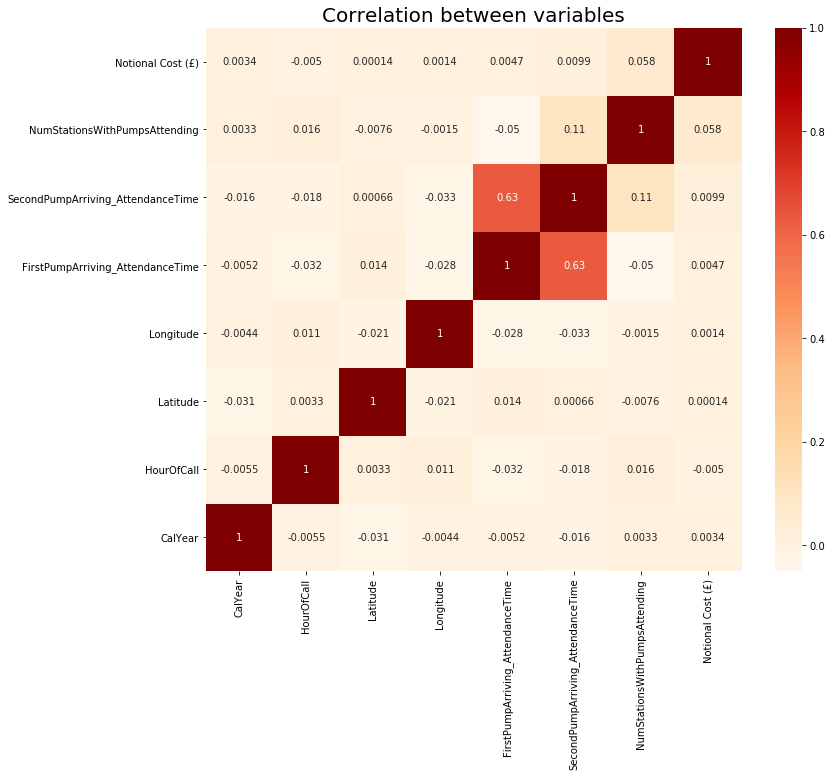

In [154]:
corr=data_cleans.corr()
plt.figure(figsize = (12,10))        # Sample figsize in inches
ax= sns.heatmap(corr,cmap='OrRd',annot=True)
ax.set_ylim([0,8])

ax.set_title('Correlation between variables', fontsize =20)

In [212]:
def abhWeightVector(Mat):
    sizeMat = Mat.shape[0]
    #print(Mat)
    #print(sizeMat)

    # 计算矩阵A的特征值，特征向量
    eigenvalueMat, eigenvectorMat = np.linalg.eig(Mat)
    #print("特征值：", eigenvalueMat)
    #print("特征向量：", eigenvectorMat)
    
    # 将所有特征值取绝对值
    absEigenvalueMat = map(abs, eigenvalueMat)
    absEigenvalueMat = list(absEigenvalueMat)  
    #print(absEigenvalueMat)
    
    # 绝对值最大的特征值
    maxEigenvalueMat = max(absEigenvalueMat)
    #print("绝对值最大的特征值：", maxEigenvalueMat)
    
    # 绝对值最大的特征值的索引
    maxEigenvalueIndexMat = absEigenvalueMat.index(maxEigenvalueMat)
    #print(maxEigenvalueIndexMat)
    
    # 绝对值最大的特征值对应的特征向量
    maxEigenvectorMat = eigenvectorMat[:, maxEigenvalueIndexMat]
    #print("绝对值最大的特征值对应的特征向量：", maxEigenvectorMat)
    
    # 将上述特征向量标准化，即权向量   
    standardizeVectorMat = list(map(abs, maxEigenvectorMat)) / sum(list(map(abs, maxEigenvectorMat)))
    #print(standardizeVectorMat)
    
    # 计算不一致程度CI
    CI = (maxEigenvalueMat - sizeMat) / (sizeMat - 1)
    print('CI',CI)
    
    # 平均随机一致性指标RI
    listRI = [0, 0, 0.58, 0.90, 1.12, 1.24, 1.32, 1.41, 1.45]
    
    #计算随机一致性比率
    CR = CI / listRI[sizeMat - 1]
    print('CR',CR)
    
    return standardizeVectorMat
   

MatA = np.array([[1,3,1,5,1],[1/3,1,1/5,3,1/4],
                [1,5,1,5,1/2],[1/5,1/3,1/5,1,1/6],[1,4,2,6,1]])
standardizeVectorMatA = abhWeightVector(MatA)
print(standardizeVectorMatA)

CI 0.04080305123140815
CR 0.0364312957423287
[0.26303144 0.08723057 0.26390232 0.04590649 0.33992918]


In [106]:
lsoa_br = df_br.loc[df_br['IncGeo_BoroughName']=='BARNET']

In [128]:
lsoa_br.groupby('Postcode_full').count()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
Postcode_full,,,,,,,,,,,,,,,,,,,,,
EN4 0NJ,3,3,3,3,3,3,3,0,3,3,...,3,3,3,1,1,3,3,3,3,3
EN4 0NQ,2,2,2,2,2,2,2,0,2,2,...,2,2,2,0,0,2,2,2,2,2
EN4 8AA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1
EN4 8AD,2,2,2,2,2,2,2,0,2,2,...,2,2,2,0,0,2,2,2,2,2
EN4 8AE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD6 2RN,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,0,1,1,1,1,1
WD6 2RW,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,1,1,1,1
WD6 3BL,5,5,5,5,5,5,5,4,5,5,...,5,4,4,3,3,5,5,5,5,5


In [163]:
#the total fire
fila_br=pd.DataFrame(lsoa_br.groupby('Postcode_full').CalYear.count())

In [164]:
fila_br['fire']=fila_br['CalYear']/(4+2/9)

In [165]:
lsoa_br = lsoa_br.rename(columns={'Notional Cost (£)': 'cost'})

In [166]:
#the average cost
fila_br['cost']=pd.DataFrame(lsoa_br.groupby('Postcode_full').cost.mean())

In [207]:
#the average hours of call
fila_br['hour']=pd.DataFrame(lsoa_br.groupby('Postcode_full').HourOfCall.mean())

In [169]:
#the average number of station attendend
fila_br['station']=pd.DataFrame(lsoa_br.groupby('Postcode_full').NumStationsWithPumpsAttending.mean())

In [167]:
#the average time
fila_br['time']=pd.DataFrame(lsoa_br.groupby('Postcode_full').FirstPumpArriving_AttendanceTime.mean())

In [170]:
fila_br.head()

,CalYear,fire,cost,time,station
Postcode_full,,,,,
EN4 0NJ,3,0.710526,333.333333,398.0,1.333333
EN4 0NQ,2,0.473684,497.000000,540.0,1.000000
EN4 8AA,1,0.236842,333.000000,213.0,1.000000
EN4 8AD,2,0.473684,336.000000,239.5,1.000000
EN4 8AE,1,0.236842,333.000000,279.0,2.000000


In [189]:
fila_br.isnull().sum()

CalYear    0
fire       0
cost       0
time       0
station    0
dtype: int64

In [184]:
#fill the time 
fila_br['time'] = fila_br['time'].fillna(fila_br['time'].sum()/2114)

In [188]:
#delet the unusefull fire alarm
fila_br=fila_br.dropna()

In [197]:
#fit the data (let the range of data between 0-1)
from sklearn.preprocessing import Normalizer

X=[fila_br['time']]
transformer = Normalizer().fit(X) # fit does nothing.

Normalizer(copy=True, norm='l2')
fila_br['Time']=transformer.transform(X).flatten()

In [203]:
# fire
X=[fila_br['fire']]
transformer = Normalizer().fit(X) # fit does nothing.

Normalizer(copy=True, norm='l2')
fila_br['Fire']=transformer.transform(X).flatten()


In [204]:
#cost
X=[fila_br['cost']]
transformer = Normalizer().fit(X) # fit does nothing.

Normalizer(copy=True, norm='l2')
fila_br['Cost']=transformer.transform(X).flatten()

In [205]:
#station

X=[fila_br['station']]
transformer = Normalizer().fit(X) # fit does nothing.

Normalizer(copy=True, norm='l2')
fila_br['Station']=transformer.transform(X).flatten()

In [208]:
#station

X=[fila_br['hour']]
transformer = Normalizer().fit(X) # fit does nothing.

Normalizer(copy=True, norm='l2')
fila_br['Hour']=transformer.transform(X).flatten()

In [224]:
fila_br.head()

,CalYear,fire,cost,time,station,Time,Fire,Cost,Station,hour,Hour,mark
Postcode_full,,,,,,,,,,,,
EN4 0NJ,3,0.710526,333.333333,398.0,1.333333,0.022604,0.010566,0.001814,0.021839,14.333333,0.021050,128.548797
EN4 0NQ,2,0.473684,497.000000,540.0,1.000000,0.030668,0.007044,0.002704,0.016379,11.000000,0.016155,133.371352
EN4 8AA,1,0.236842,333.000000,213.0,1.000000,0.012097,0.003522,0.001812,0.016379,22.000000,0.032309,84.271430
EN4 8AD,2,0.473684,336.000000,239.5,1.000000,0.013602,0.007044,0.001828,0.016379,16.500000,0.024232,93.201576
EN4 8AE,1,0.236842,333.000000,279.0,2.000000,0.015845,0.003522,0.001812,0.032758,17.000000,0.024966,95.248200


In [245]:
fila_br.mark.describe()

count    2146.000000
mean        1.175137
std         0.894716
min         0.296204
25%         0.900179
50%         1.050142
75%         1.263150
max        27.507437
Name: mark, dtype: float64

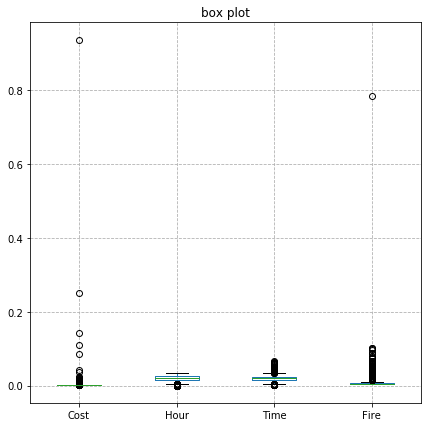

In [290]:
box_br.plot.box(title='box plot',figsize=(7,7))
plt.grid(linestyle="--", alpha=1)
plt.show()


In [281]:
box_br=pd.DataFrame(fila_br['CalYear'])

In [282]:
box_br['Cost']=fila_br['Cost']
box_br['Hour']=fila_br['Hour']
box_br['Time']=fila_br['Time']
box_br['Fire']=fila_br['Fire']

In [286]:
box_br=box_br.drop(['CalYear'],axis=1)

In [239]:
#get the weighted value and sum up
fila_br['mark']=(fila_br['Station']*4.59+fila_br['Cost']*26.39+fila_br['Fire']*33.99+fila_br['Hour']*8.72+fila_br['Time']*26.31)

In [75]:
post=pd.read_csv('E:/google/barnet_code.csv')

In [76]:
post.head()

,pcd7,pcd8,pcds,dointr,doterm,usertype,oa11,lsoa11cd,msoa11cd,ladcd,lsoa11nm,msoa11nm,ladnm,ladnmw,FID
0,EN4 0QF,EN4 0QF,EN4 0QF,200106,200204,1,E00001343,E01000267,E02000028,E09000003,Barnet 005A,Barnet 005,Barnet,NaN,792001
1,EN4 0QX,EN4 0QX,EN4 0QX,200106,0,1,E00001343,E01000267,E02000028,E09000003,Barnet 005A,Barnet 005,Barnet,NaN,792014
2,EN4 0QY,EN4 0QY,EN4 0QY,200106,200203,1,E00001343,E01000267,E02000028,E09000003,Barnet 005A,Barnet 005,Barnet,NaN,792015
3,EN4 0UN,EN4 0UN,EN4 0UN,200306,200601,1,E00001343,E01000267,E02000028,E09000003,Barnet 005A,Barnet 005,Barnet,NaN,792019
4,EN4 0WA,EN4 0WA,EN4 0WA,200112,200307,1,E00001343,E01000267,E02000028,E09000003,Barnet 005A,Barnet 005,Barnet,NaN,792020


In [241]:
df_7= post.merge(fila_br, left_on="pcd7", right_on="Postcode_full")

In [242]:
loc_7=lsoa.merge(df_7, left_on="LSOA11CD",right_on="lsoa11cd")

In [332]:
station=loc_7.loc[loc_7.pcd7== 'EN5 1TE']

In [339]:
station_b=loc_7.loc[loc_7.pcd7== 'N3 2RP']

In [340]:
station_c=loc_7.loc[loc_7.pcd7== 'NW4 4BL']

In [341]:
station_d=loc_7.loc[loc_7.pcd7== 'NW7 2HX']

In [ ]:
fila_7p=loc_7.plot(column = 'mark',cmap='OrRd',edgecolor='black',figsize=(10,10),legend= True,scheme = 'user_defined', classification_kwds={'bins':[0.9,1.05,1.26,10]})
fila_7p.set_title('Comprehensive fire risk index' ,fontdict={'fontsize':20},pad=12.5)
station.plot(ax=fila_7p, color='blue')
station_c.plot(ax=fila_7p, color='blue')
station_d.plot(ax=fila_7p, color='blue')
plt.show()

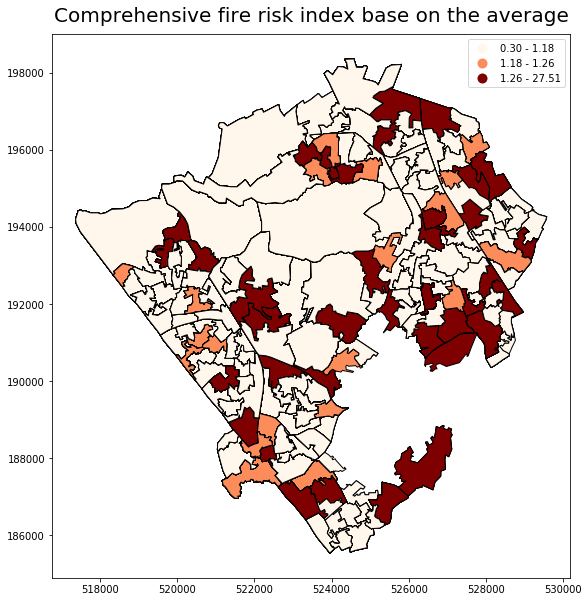

In [362]:
fila_7p=loc_7.plot(column = 'mark',cmap='OrRd',edgecolor='black',figsize=(10,10),legend= True,scheme = 'user_defined', classification_kwds={'bins':[1.18,1.26]})
fila_7p.set_title('Comprehensive fire risk index base on the average' ,fontdict={'fontsize':20},pad=12.5)

plt.show()

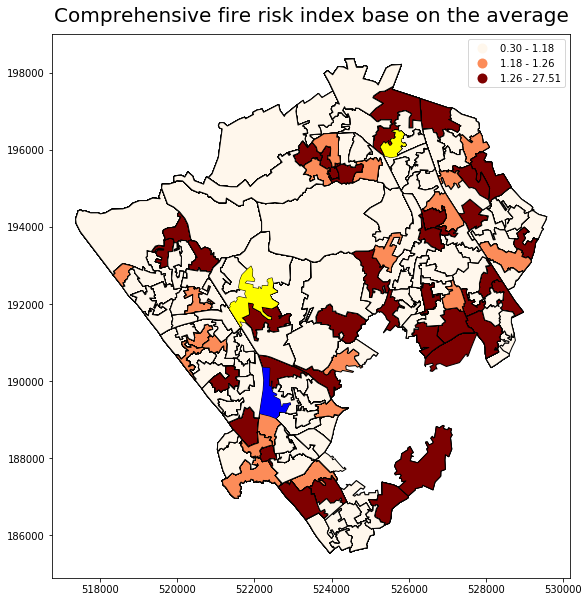

In [364]:
fila_7p=loc_7.plot(column = 'mark',cmap='OrRd',edgecolor='black',figsize=(10,10),legend= True,scheme = 'user_defined', classification_kwds={'bins':[1.18,1.26]})
fila_7p.set_title('Comprehensive fire risk index base on the average' ,fontdict={'fontsize':20},pad=12.5)
station.plot(ax=fila_7p, color='yellow')
station_c.plot(ax=fila_7p, color='blue')
station_d.plot(ax=fila_7p, color='yellow')
plt.show()

In [ ]:
#show the map
data_8p=data_8.plot(column = 'fire',cmap='OrRd',edgecolor='black', figsize=(10,10),legend= True, scheme = 'user_defined', classification_kwds={'bins':[150,300,450,600]})
data_8p.set_title('Fire distribution in 2018 (average month)',fontdict={'fontsize':20},pad=12.5)

In [ ]:
#show the map
data_7p=data_7.plot(column = 'fire',cmap='OrRd',edgecolor='black', figsize=(10,10),legend= True, scheme = 'user_defined', classification_kwds={'bins':[150,300,450,600]})
data_7p.set_title('Fire distribution in 2017 (average month)',fontdict={'fontsize':20},pad=12.5)

In [388]:
bef_20 = data.loc[data['DateOfCall']>='2020-03-20']
aft_20 = data.loc[data['DateOfCall']<'2020-03-20']

In [396]:
bef_20.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,cost
335515,034309-20032020,2020-03-20,2020,1900/1/0 1:32,1,False Alarm,False alarm - Malicious,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,...,West Hampstead,324.0,West Hampstead,NaN,NaN,1.0,1.0,1.0,1.0,339.0
335516,034322-20032020,2020-03-20,2020,1900/1/0 4:31,4,False Alarm,AFA,NaN,Non Residential,Warehouse,...,Northolt,1176.0,Northolt,NaN,NaN,1.0,1.0,1.0,2.0,678.0
335517,034624-20032020,2020-03-20,2020,1900/1/0 19:19,19,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,Tottenham,257.0,Tottenham,280.0,Tottenham,1.0,2.0,2.0,1.0,339.0
335518,034496-20032020,2020-03-20,2020,1900/1/0 14:26,14,False Alarm,AFA,NaN,Non Residential,Warehouse,...,East Ham,191.0,East Ham,NaN,NaN,1.0,1.0,1.0,1.0,339.0
335519,034469-20032020,2020-03-20,2020,1900/1/0 13:26,13,False Alarm,AFA,NaN,Non Residential,Library,...,Ilford,438.0,East Ham,NaN,NaN,1.0,1.0,1.0,1.0,339.0


In [389]:
bef_20 = bef_20.rename(columns={'Notional Cost (£)': 'cost'})
aft_20 = aft_20.rename(columns={'Notional Cost (£)': 'cost'})

In [393]:
fire_data=pd.DataFrame(aft_20.groupby('IncGeo_BoroughCode').cost.count())/(2/3+38)

In [394]:
fire_data['close_count']=pd.DataFrame(bef_20.groupby('IncGeo_BoroughCode').cost.count())/(2+1/3)

In [397]:
fire_data['close_time']=pd.DataFrame(bef_20.groupby('IncGeo_BoroughCode').FirstPumpArriving_AttendanceTime.mean())

In [399]:
fire_data['time']=pd.DataFrame(aft_20.groupby('IncGeo_BoroughCode').FirstPumpArriving_AttendanceTime.mean())

In [403]:
fire_data.head()

,cost,close_count,close_time,time,time_difference,fire_difference
IncGeo_BoroughCode,,,,,,
E09000001,104.172414,44.142857,265.383838,291.446615,26.062776,60.029557
E09000002,173.534483,170.571429,311.324742,338.348370,27.023627,2.963054
E09000003,289.758621,279.428571,304.454264,344.223689,39.769426,10.330049
E09000004,186.232759,197.142857,322.925843,341.231135,18.305293,-10.910099
E09000005,270.724138,251.571429,308.157895,340.611960,32.454065,19.152709


In [429]:
#difference : before - after(封城之前-封城之后)
fire_data['time_difference']=fire_data['close_time']-fire_data['time']

In [425]:
#difference of fire counts
fire_data['fire_difference']=fire_data['close_count']-fire_data['cost']

In [430]:
#difference rate of time
fire_data['time_rate']=fire_data['time_difference']/fire_data['time']*100

In [426]:
fire_data['diff_rate']=fire_data['fire_difference']/fire_data['cost']*100

In [414]:
fire_data.close_count.describe()

count     33.000000
mean     236.584416
std       79.691492
min       44.142857
25%      197.142857
50%      248.571429
75%      279.428571
max      460.714286
Name: close_count, dtype: float64

In [431]:
fire_data.time_rate.describe()

count    33.000000
mean     -8.836950
std       3.113564
min     -18.581967
25%      -9.785801
50%      -9.146272
75%      -7.986924
max      -2.224071
Name: time_rate, dtype: float64

In [427]:
fire_data.diff_rate.describe()

count    33.000000
mean     -8.444949
std      12.585259
min     -57.625195
25%     -12.374319
50%      -4.778241
75%      -1.707473
max       7.584283
Name: diff_rate, dtype: float64

In [444]:
data_2=brough.merge(fire_data, left_on="GSS_CODE", right_on="IncGeo_BoroughCode")

In [ ]:
import mapclassify

Text(0.5, 1, 'Fire increase rate %')

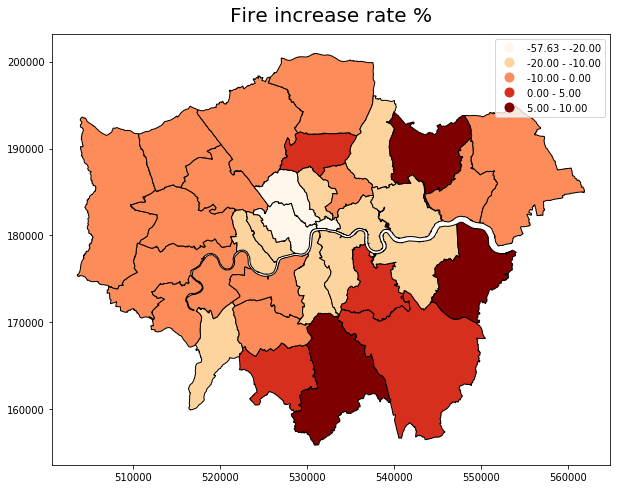

In [456]:
#fire diff
data_2p=data_2.plot(column = 'diff_rate',cmap='OrRd',edgecolor='black', figsize=(10,10),legend= True, scheme = 'user_defined', classification_kwds={'bins':[-20,-10,0,5,10]})
data_2p.set_title('Fire increase rate %',fontdict={'fontsize':20},pad=12.5)

Text(0.5, 1, 'Time increase rate %')

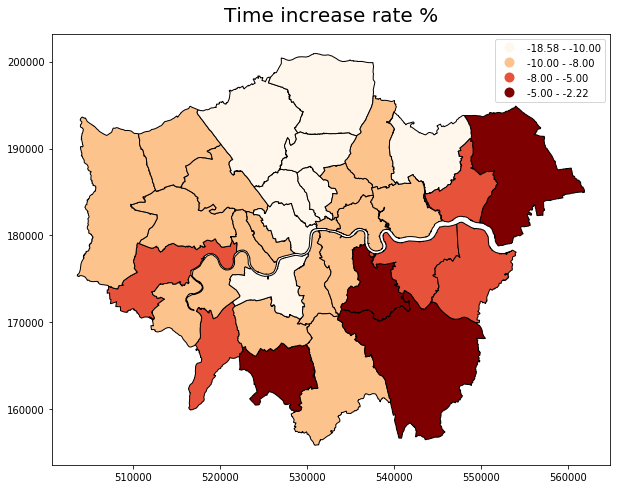

In [457]:
#time diff
data_2p=data_2.plot(column = 'time_rate',cmap='OrRd',edgecolor='black', figsize=(10,10),legend= True, scheme = 'user_defined', classification_kwds={'bins':[-10,-8,-5]})
data_2p.set_title('Time increase rate %',fontdict={'fontsize':20},pad=12.5)

Text(0.5, 1.0, 'The increase rate of different brough (%)')

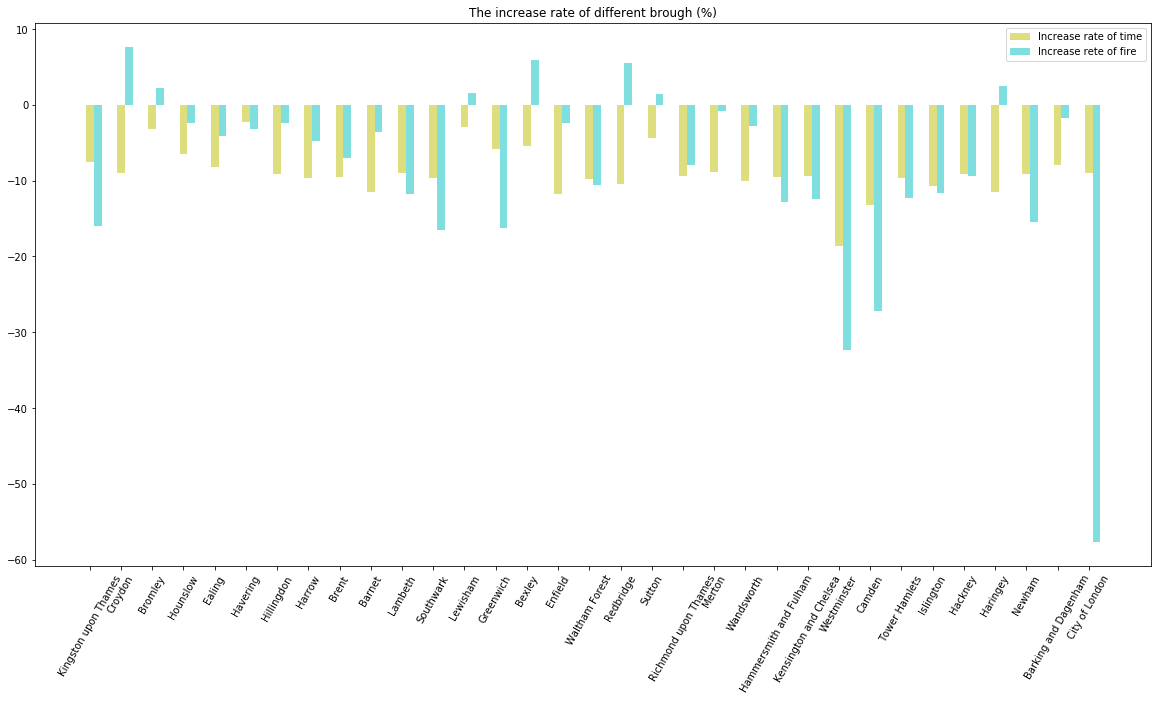

In [458]:
x1 = data_2['NAME']   #横坐标
y = data_2['time_rate']
y1 = data_2['diff_rate']   #第一个纵坐标

x = np.arange(len(x1)) 




# plt the data
plt.figure(figsize=(20, 10))
#2020
plt.bar(x, y,
        width = 0.25,
        color = 'y',
        align = 'center',
        label = 'Increase rate of time',
        alpha = 0.5
       )
# 2019
plt.bar(x+ 0.25, y1,
        width = 0.25,
        color = 'c',
        align = 'center',
        label = 'Increase rete of fire',
        alpha = 0.5
       )
plt.xticks(x,(x1),rotation=60)
# 图例
plt.legend(loc = 'upper right')

# 标题
plt.title('The increase rate of different brough (%)')

In [472]:
#bef_20 = bef_20.rename(columns={'Notional Cost (£)': 'cost'})
#aft_20 = aft_20.rename(columns={'Notional Cost (£)': 'cost'})


In [471]:
wes_20=bef_20.loc[bef_20['IncGeo_BoroughName']=='WESTMINSTER']
cam_20=bef_20.loc[bef_20['IncGeo_BoroughName']=='CAMDEN']
col_20=bef_20.loc[bef_20['IncGeo_BoroughName']=='CITY OF LONDON']

In [474]:
wes_00=aft_20.loc[aft_20['IncGeo_BoroughName']=='WESTMINSTER']
cam_00=aft_20.loc[aft_20['IncGeo_BoroughName']=='CAMDEN']
col_00=aft_20.loc[aft_20['IncGeo_BoroughName']=='CITY OF LONDON']

In [598]:
wes_20.groupby('PropertyCategory').CalYear.count()

PropertyCategory
Boat                   1
Dwelling             588
Non Residential      343
Other Residential     37
Outdoor               47
Outdoor Structure     47
Road Vehicle          14
Name: CalYear, dtype: int64

In [496]:
top_20=pd.DataFrame(wes_20.groupby('PropertyCategory').CalYear.count())/(2+1/3)

In [497]:
top_20['cam']=pd.DataFrame(cam_20.groupby('PropertyCategory').CalYear.count())/(2+1/3)

In [498]:
top_20['col']=pd.DataFrame(col_20.groupby('PropertyCategory').CalYear.count())/(2+1/3)

In [500]:
top_20 = top_20.rename(columns={'CalYear':'wes'})

In [504]:
top_00=pd.DataFrame(wes_00.groupby('PropertyCategory').CalYear.count())/(2/3+38)

In [505]:
top_00['cam_nonclosed']=pd.DataFrame(cam_00.groupby('PropertyCategory').CalYear.count())/(2/3+38)
top_00['col_nonclosed']=pd.DataFrame(col_00.groupby('PropertyCategory').CalYear.count())/(2/3+38)

In [506]:
top_00.head()

,CalYear,cam_nonclosed,col_nonclosed
PropertyCategory,,,
Boat,0.387931,0.258621,0.051724
Dwelling,274.810345,186.646552,8.612069
Non Residential,294.543103,141.336207,86.405172
Other Residential,34.810345,35.198276,2.870690
Outdoor,17.974138,15.439655,2.456897


In [613]:
prop=top_00.merge(top_20, on = 'PropertyCategory')

In [615]:
prop=prop.fillna(0)

In [616]:
#增长率=（本期数-上期数）/上期数*100%

prop['wes_rate']=(prop['wes']-prop['CalYear'])/prop['CalYear']
prop['cam_rate']=(prop['cam']-prop['cam_nonclosed'])/prop['cam_nonclosed']
prop['col_rate']=(prop['col']-prop['col_nonclosed'])/prop['col_nonclosed']

In [617]:
prop['1']=['Boat','Dwelling','Non Residential','Other Residential','Outdoor','Outdoor Structure','Road Vehicle']

In [618]:
prop

,CalYear,cam_nonclosed,col_nonclosed,wes,cam,col,wes_rate,cam_rate,col_rate,1
PropertyCategory,,,,,,,,,,
Boat,0.387931,0.258621,0.051724,0.428571,0.428571,0.000000,0.104762,0.657143,-1.000000,Boat
Dwelling,274.810345,186.646552,8.612069,252.000000,167.142857,7.285714,-0.083004,-0.104495,-0.154011,Dwelling
Non Residential,294.543103,141.336207,86.405172,147.000000,64.714286,33.428571,-0.500922,-0.542125,-0.613118,Non Residential
Other Residential,34.810345,35.198276,2.870690,15.857143,30.000000,1.285714,-0.544470,-0.147686,-0.552124,Other Residential
Outdoor,17.974138,15.439655,2.456897,20.142857,18.857143,1.285714,0.120658,0.221345,-0.476692,Outdoor
Outdoor Structure,43.189655,16.344828,2.431034,20.142857,9.428571,0.428571,-0.533618,-0.423146,-0.823708,Outdoor Structure
Road Vehicle,18.129310,12.594828,1.991379,6.000000,7.714286,0.428571,-0.669044,-0.387504,-0.784787,Road Vehicle


Text(0.5, 1.0, 'The increase rate of different brough (%)')

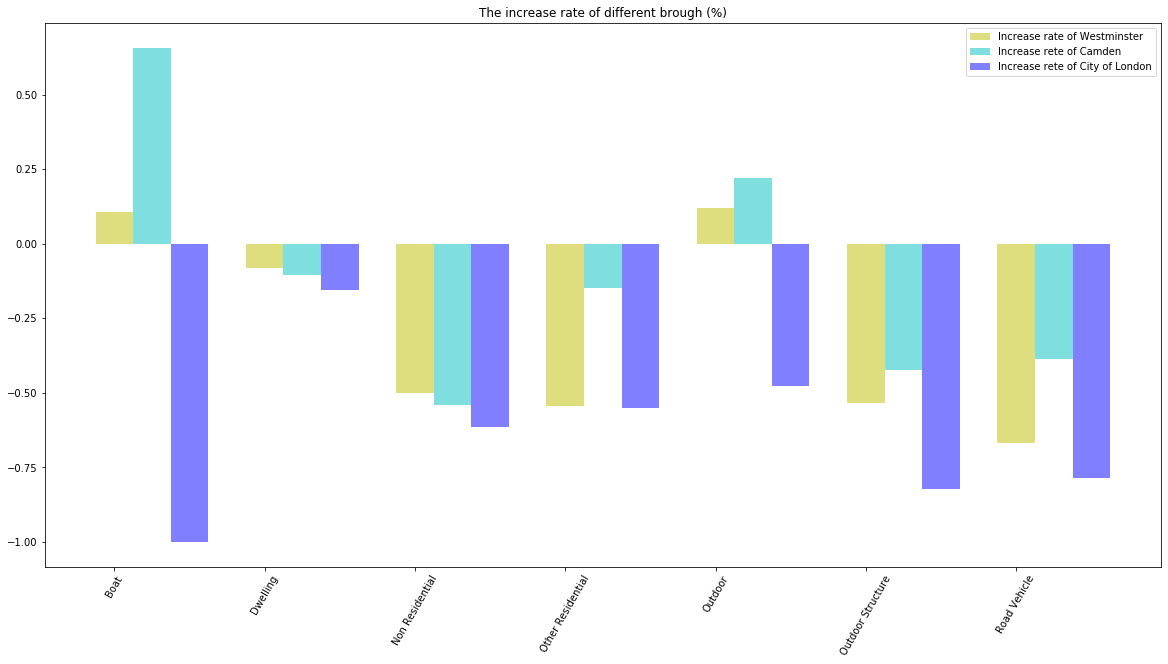

In [619]:
x1=prop['1']
y = prop['wes_rate']
y1 = prop['cam_rate']   
y2= prop['col_rate']
x = np.arange(len(x1)) 




# plt the data
plt.figure(figsize=(20, 10))
#2020
plt.bar(x, y,
        width = 0.25,
        color = 'y',
        align = 'center',
        label = 'Increase rate of Westminster',
        alpha = 0.5
       )
# 2019
plt.bar(x+ 0.25, y1,
        width = 0.25,
        color = 'c',
        align = 'center',
        label = 'Increase rete of Camden',
        alpha = 0.5
       )

plt.bar(x+ 0.5, y2,
        width = 0.25,
        color = 'b',
        align = 'center',
        label = 'Increase rete of City of London',
        alpha = 0.5
       )
plt.xticks(x,(x1),rotation=60)
# 图例
plt.legend(loc = 'upper right')

# 标题
plt.title('The increase rate of different brough (%)')

In [ ]:
fila_br=pd.DataFrame(lsoa_br.groupby('Postcode_full').CalYear.count())

In [ ]:
fire_2020 = fire_2020.rename(columns={'LAD11CD\t': 'GSS_CODE'})

In [ ]:
#merge the data
data=lsoa.merge(fire_2020, on = 'GSS_CODE'

In [464]:
print((73+66)/2)

69.5


In [ ]:
#difference
data_p=data.plot(column = 'fire_count',cmap='OrRd',edgecolor='black', figsize=(10,10),legend= True, scheme = 'user_defined', classification_kwds={'bins':[500,1000,1500,2000,2500]})
data_p.set_title('Total fire distribution in 2020',fontdict={'fontsize':20},pad=12.5)

NameError: name 'za_points' is not defined

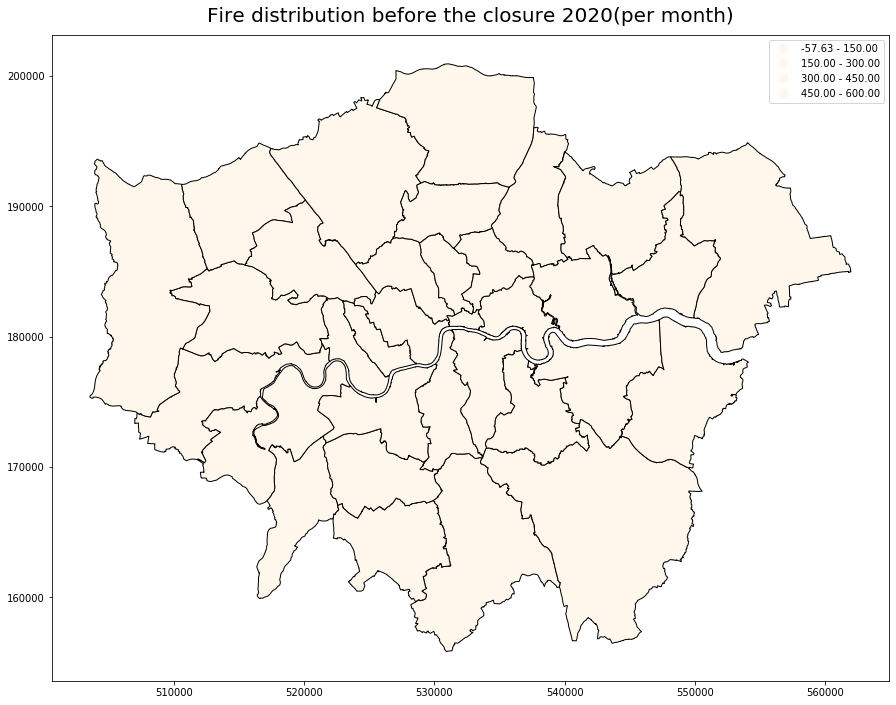

In [459]:
#before
data_1p=data_2.plot(column = 'diff_rate',edgecolor='black',cmap='OrRd', figsize=(15,12),legend= True, scheme = 'user_defined', classification_kwds={'bins':[150,300,450,600]})
data_1p.set_title('Fire distribution before the closure 2020(per month)',fontdict={'fontsize':20},pad=12.5)
#add the name of the brough
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["NAME"]):
    texts.append(plt.text(x, y, label, fontsize = 8,color='blue'))

In [460]:
#get the brough name on the map

brough["center"] = brough["geometry"].centroid
za_points = lsoa.copy()
za_points.set_geometry("center", inplace = True)

ValueError: Unknown column center